In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import json,sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from itertools import *
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
f = open(r'shipsnet.json')
dataset = json.load(f)
f.close()

In [5]:
Target = dataset['labels'] 
Train = np.array(dataset['data']).astype('uint8')

In [57]:
print(Train)

[[ 82  89  91 ...  86  88  89]
 [ 76  75  67 ...  54  57  58]
 [125 127 129 ... 111 109 115]
 ...
 [171 135 118 ...  95  95  85]
 [ 85  90  94 ...  96  95  89]
 [122 122 126 ...  51  46  69]]


In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(Train,Target,test_size = 0.2 ,random_state = 123)

In [59]:
len(X_train)

3200

In [60]:
len(X_test)

800

In [61]:
len(Y_train)

3200

In [62]:
len(Y_test)

800

# Logistic Regression Model 

In [7]:
LR = LogisticRegression() #load in model
reg = LR.fit(X_train, Y_train)
pred_LR = LR.predict(X_test)
score = LR.score(X_test, Y_test)
print(score) #mean accuracy score

0.89625


In [48]:
cm_LR = metrics.confusion_matrix(Y_test, pred_LR) #quick confusion matrix 
print(cm)

[[553  52]
 [ 31 164]]


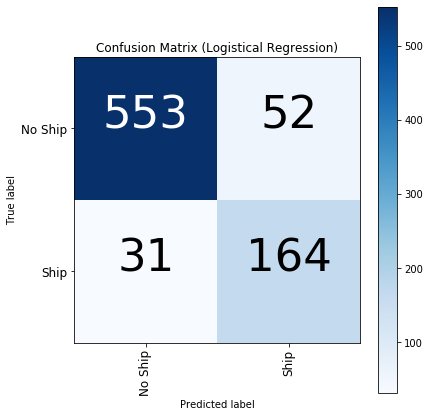

In [50]:
from itertools import *
#confusion matrix plot
def plot_confusion_matrix(Y_test,pred_LR, classes,
                          normalize=False,
                          title='Confusion Matrix (Logistical Regression)',
                          cmap=plt.cm.Blues):
   
    plt.figure(figsize = (6,6))
    plt.imshow(cm_LR, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,size = 12)
    plt.yticks(tick_marks, classes,size = 12)
    plt.ylim([1.5, -.5])
    
    thresh = cm_LR.max() / 2.
    
    
    for i in range (cm_LR.shape[0]):
        for j in range (cm_LR.shape[1]):
            
            plt.text(j, i, cm_LR[i, j],fontsize=45,
                 horizontalalignment="center",
                 color="white" if cm_LR[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
dict_characters = {0: 'No Ship', 1: 'Ship'}    
plot_confusion_matrix(Y_test,pred_LR, classes = list(dict_characters.values())) 
plt.show()  

In [10]:
print(classification_report(Y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       605
           1       0.76      0.84      0.80       195

    accuracy                           0.90       800
   macro avg       0.85      0.88      0.86       800
weighted avg       0.90      0.90      0.90       800



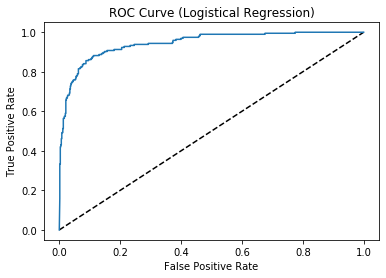

In [11]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = LR.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistical Regression)')
plt.show()

# XGBoost Classifier Model

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance 

In [12]:
XGB = XGBClassifier() #load model
reg = XGB.fit(X_train, Y_train)
pred_XGB = XGB.predict(X_test)
score = XGB.score(X_test, Y_test)
print(score) #mean accuracy score

0.955


In [13]:
cm_XGB = metrics.confusion_matrix(Y_test, pred_XGB) #quick confusion matrix
print(cm_XGB)

[[592  13]
 [ 23 172]]


In [14]:
print(classification_report(Y_test, pred_XGB))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       605
           1       0.93      0.88      0.91       195

    accuracy                           0.95       800
   macro avg       0.95      0.93      0.94       800
weighted avg       0.95      0.95      0.95       800



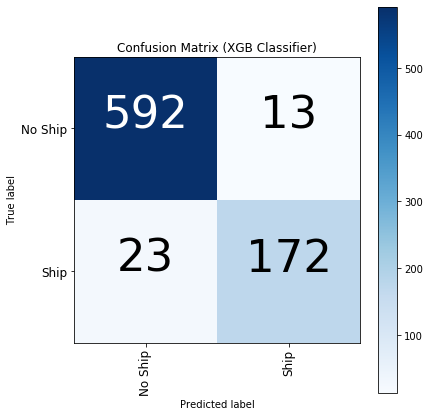

In [51]:
from itertools import *
#confusion matrix plot
def plot_confusion_matrix(Y_test,pred_XGB, classes,
                          normalize=False,
                          title='Confusion Matrix (XGB Classifier)',
                          cmap=plt.cm.Blues):
   
    plt.figure(figsize = (6,6))
    plt.imshow(cm_XGB, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,size = 12)
    plt.yticks(tick_marks, classes,size = 12)
    plt.ylim([1.5, -.5])
    
    thresh = cm_XGB.max() / 2.
    
    
    for i in range (cm_XGB.shape[0]):
        for j in range (cm_XGB.shape[1]):
            
            plt.text(j, i, cm_XGB[i, j],fontsize=45,
                 horizontalalignment="center",
                 color="white" if cm_XGB[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
dict_characters = {0: 'No Ship', 1: 'Ship'}    
plot_confusion_matrix(Y_test,pred_XGB, classes = list(dict_characters.values())) 
plt.show() 

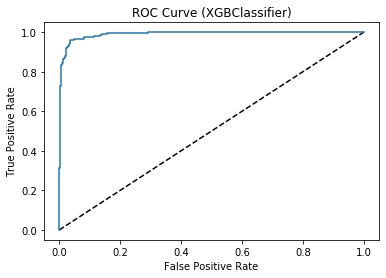

In [16]:


# Compute predicted probabilities: y_pred_prob
y_pred_prob = XGB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBClassifier)')
plt.show()

In [52]:
len(pred_XGB)

800

# Visualization

In [150]:
from PIL import Image, ImageDraw  

image = Image.open('scenes/scenes/sfbay_1.png')
pix = image.load()
n_spectrum = 3
width = image.size[0]
height = image.size[1]
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [151]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

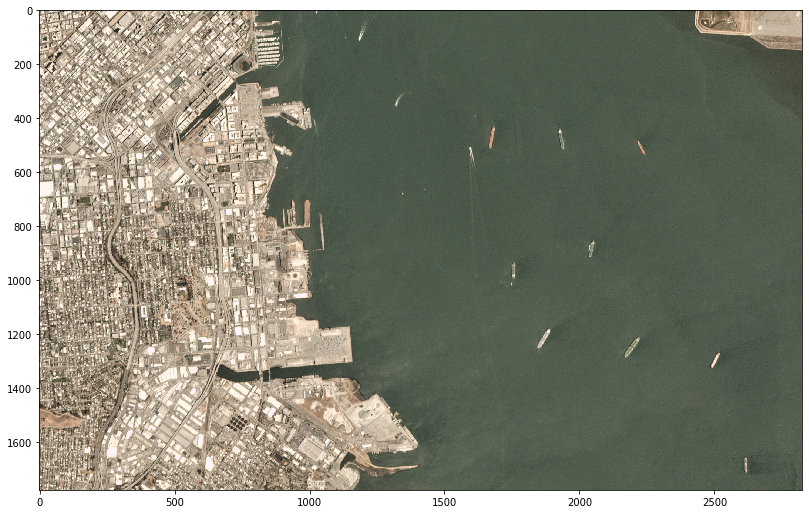

In [152]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show() #plotting a scene to see whole picture. Multiple scenes were used this is just one

In [87]:
input_data = np.array(dataset['data']).astype('uint8')
labels_data = np.array(dataset['labels']).astype('uint8')

In [88]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X.shape

(4000, 3, 80, 80)

In [89]:
Xt=X.transpose(0,2,3,1)
Xt.shape

(4000, 80, 80, 3)

In [94]:
data_train=X_train.reshape(-1, n_spectrum, weight, height)
data_test=X_test.reshape(-1, n_spectrum, weight, height)

In [112]:
Y_test_1 = np.asarray(Y_test)
Y_test_1.shape


(800,)

In [120]:
data_test.shape

(800, 3, 80, 80)

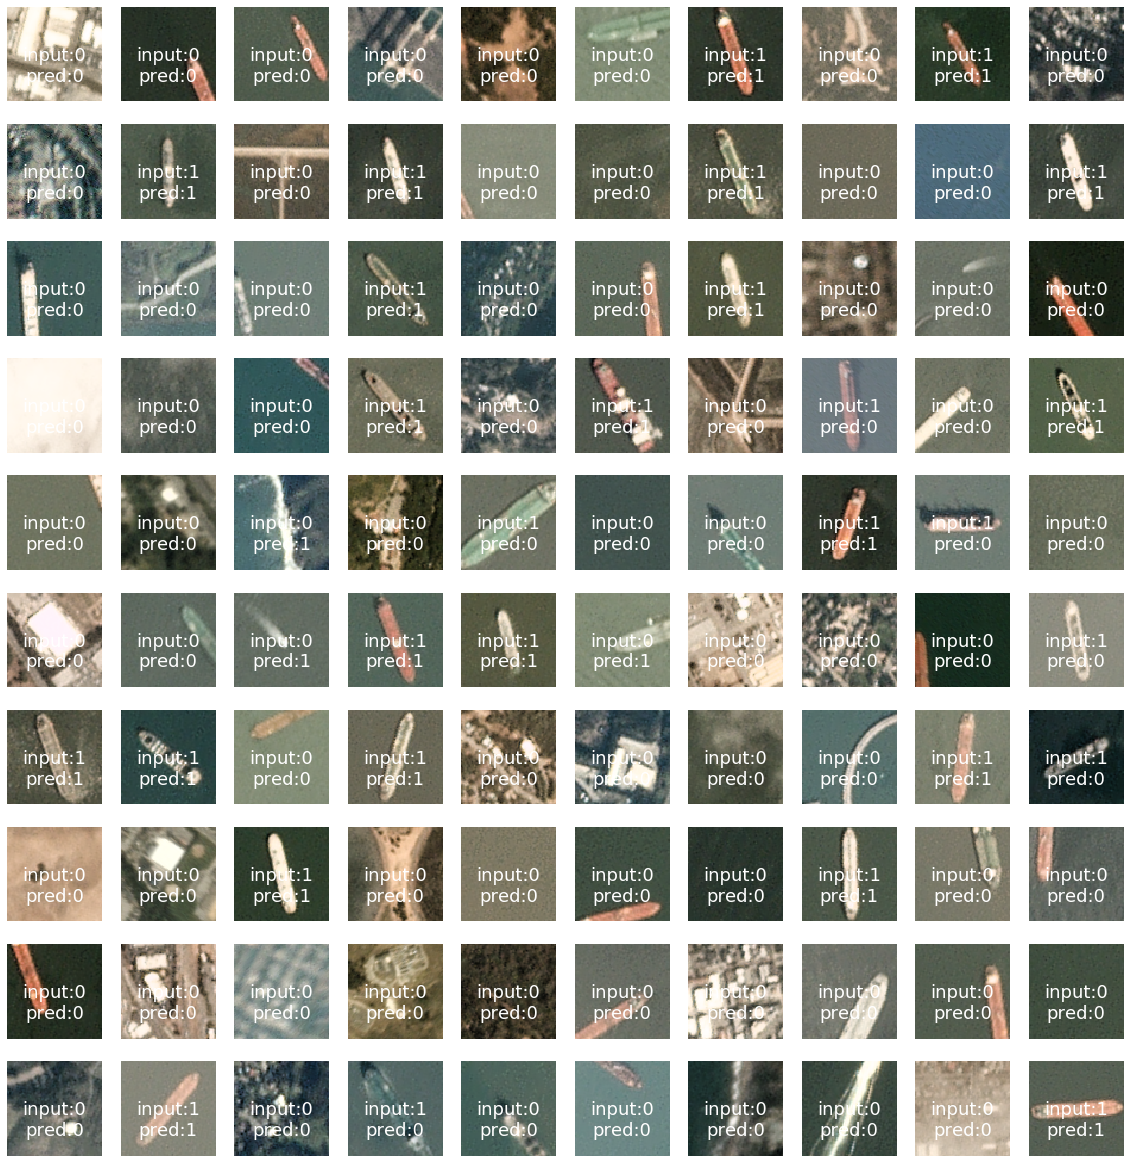

In [149]:
#plotting classified images with input/prediction values 

fig=plt.figure(figsize=(20, 20))

random.randint(0,len(data_test))

data_t_test=data_test.transpose(0,2,3,1)
# show each channel
for i in range(0,100):
    fig.add_subplot(10, 10, i+1)
    fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=.2, hspace=.2)
    plt.imshow(data_t_test[i,:,:,:])
    plt.title('input:'+str(Y_test_1[i])+'\npred:'+str(pred_XGB[i]), fontsize=18, y=.15,color='w')
    plt.axis('off')
plt.show() 
